In [1]:
import pandas as pd

# Location of dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign column names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
irisdata = pd.read_csv(url, names=names)

In [2]:
irisdata.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Assign data from first four columns to X variable
X = irisdata.iloc[:, 0:4]

# Assign data from fifth column to y variable
y = irisdata.iloc[:, 4]


In this code snippet, iloc[:, 4] selects all rows from the fifth column of irisdata and assigns it to the variable y.








In [4]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Class, dtype: object

let's see how many unique values we have in our y series.

In [5]:
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

We have three unique classes: 'Iris-setosa', 'Iris-versicolor' and 'Iris-virginica'. Let's convert these categorical values to numerical values. To do so we will use Scikit-Learn's LabelEncoder class.

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# Fit and transform y
y_encoded = le.fit_transform(y)





 if you check unique values in the y_encoded series, you will see following results:

In [7]:
import pandas as pd


# Convert y_encoded back to pandas Series
y_series = pd.Series(y_encoded)

# Print the pandas Series
print(y_series.unique())


[0 1 2]


we will divide our dataset into training and test splits. The training data will be used to train the neural network and the test data will be used to evaluate the performance of the neural network.

In [8]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_series, test_size=0.20, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


Before making actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated. Feature scaling is performed only on the training data and not on test data. This is because in the real world, data is not scaled and the ultimate purpose of the neural network is to make predictions on real world data. Therefore, we try to keep our test data as real as possible.

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Explanantion

In the line `scaler = StandardScaler()`, the `StandardScaler` method from the `sklearn.preprocessing` module is used to perform standardization on the features.

Standardization (or Z-score normalization) scales the features such that they have a mean of 0 and a standard deviation of 1. The formula for standardization is:

\[ \text{Standardized value} = \frac{\text{Original value} - \text{Mean}}{\text{Standard deviation}} \]

Here's a brief overview of how `StandardScaler` works:

1. **Fit**: When you call `scaler.fit(X_train)`, the `StandardScaler` computes the mean and standard deviation of each feature in the training set `X_train`.

2. **Transform**: After fitting the scaler, you can use it to transform the training set to standardize the features using the computed mean and standard deviation. This is done using the `scaler.transform()` method.

### Here's an example:



In [10]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Create the dataset
data = np.array([[25, 50000],
                 [30, 75000],
                 [35, 100000],
                 [40, 60000],
                 [45, 90000]])

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on the entire data
scaler.fit(data)

# Transform the entire data
data_scaled = scaler.transform(data)

# Print original and scaled data
print("Original Data:")
print(data)
print("\nScaled Data:")
print(data_scaled)


Original Data:
[[    25  50000]
 [    30  75000]
 [    35 100000]
 [    40  60000]
 [    45  90000]]

Scaled Data:
[[-1.41421356 -1.35581536]
 [-0.70710678  0.        ]
 [ 0.          1.35581536]
 [ 0.70710678 -0.81348922]
 [ 1.41421356  0.81348922]]


now it's  time to train a neural network that can actually make predictions.

In [11]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(X_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

The first step is to import the MLPClassifier class from the sklearn.neural_network library. In the second line, this class is initialized with two parameters.

The first parameter, hidden_layer_sizes, is used to set the size of the hidden layers. In our script we will create three layers of 10 nodes each. There is no standard formula for choosing the number of layers and nodes for a neural network and it varies quite a bit depending on the problem at hand. The best way is to try different combinations and see what works best.

The second parameter to MLPClassifier specifies the number of iterations, or the epochs, that you want your neural network to execute. Remember, one epoch is a combination of one cycle of feed-forward and back propagation phase.

By default the 'ReLU' activation function is used with adam cost optimizer. However, you can change these functions using the activation and solver parameters, respectively.

In the third line the fit function is used to train the algorithm on our training data i.e. X_train and y_train.

### Predictions
The final step is to make predictions on our test data. To do so, execute the following script:

In [12]:
predictions = mlp.predict(X_test)

### Evaluating the Algorithm

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

conf_matrix = confusion_matrix(y_test, predictions)
print(conf_matrix)
print(classification_report(y_test,predictions))

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



Let's break down each part of the output:

### Confusion Matrix:
```
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
```
- The confusion matrix shows the counts of true positive, false positive, true negative, and false negative predictions for each class.
- In this matrix:
  - Class `0` has 10 true positives.
  - Class `1` has 9 true positives.
  - Class `2` has 11 true positives.
  - There are no false positives or false negatives for any class.

### Classification Report:
```
              precision    recall  f1-score   support
```
- **Precision**: Precision is the ratio of true positive predictions to the total predicted positives. It indicates how many of the items identified as positive are actually positive.
  
- **Recall (Sensitivity)**: Recall is the ratio of true positive predictions to the total actual positives. It indicates how many of the actual positive items were identified correctly.
  
- **F1-Score**: The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. It is a measure of a test's accuracy and is particularly useful when the classes are imbalanced.
  
- **Support**: Support is the number of actual occurrences of the class in the specified dataset.

### Analysis:

- **Accuracy**: The overall accuracy of the model is 1.00 or 100%, which means all predictions made by the model are correct for the given test dataset.

- **Per-Class Metrics**:
  - For class `0`: Precision, Recall, and F1-score are all 1.00, indicating perfect predictions for this class.
  - For class `1`: Precision, Recall, and F1-score are all 1.00, indicating perfect predictions for this class.
  - For class `2`: Precision, Recall, and F1-score are all 1.00, indicating perfect predictions for this class.


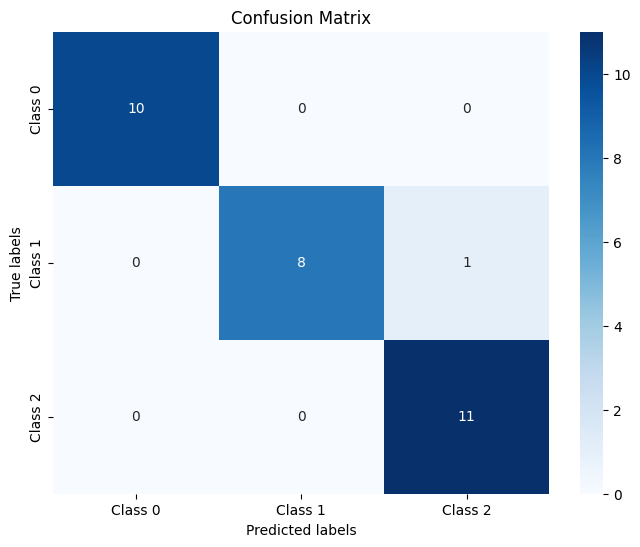

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


# Define class labels
class_labels = ['Class 0', 'Class 1', 'Class 2']

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Show plot
plt.show()


## Conclusion:
The model appears to perform exceptionally well on the test dataset, achieving perfect precision, recall, and F1-score for each class. However, it's important to note that this high level of performance might be indicative of an overfit model, especially if the model has not been evaluated on a separate validation set.

### Ref

- [https://stackabuse.com/introduction-to-neural-networks-with-scikit-learn/](https://stackabuse.com/introduction-to-neural-networks-with-scikit-learn/)